In [465]:
import numpy as np
nd = 10 
x1 = np.random.uniform(-10,-8,int(0.4*nd))
x2 = np.random.uniform(8,10,int(0.4*nd))
x3 = np.random.uniform(-8,8,nd-len(x1)-len(x2))
x_comb = np.concatenate([x1,x2,x3])
x_random = np.random.uniform(-10,10,nd)
x_uniform = np.linspace(-10,10,nd)
# x = np.ndarray((10,), buffer=np.array([-10,-8,-6,-4,-2,0,2,4,6,8]),dtype=int)

x_choose = x_comb

if x_choose.all == x_comb.all:
  data_type = 'adjusted random'
elif x_choose.all == x_random.all:
  data_type = 'random'
else:
  data_type = 'uniform' 

nd_str = str(nd)
print(x_choose)
print(type(x_choose))

#### DATA SET 1 #####
# print(data_type)
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))
# y = sigmoid(x_choose)

### DATA SET 2 #####
print(data_type)
y = sigmoid(x_choose+5)+sigmoid(-x_choose+5)-1 

#### DATA SET 3 #####
# print(data_type)
# def new_function(x):
#   return (1/3) * np.exp(np.abs(x)-9)
# y = new_function(x_choose)

#### DATA SET 4 #####
# print(data_type)
# def new_function(x):
#   return (1/3) * np.exp(np.abs(x)-9)
# y = new_function(x_choose)

#### DATA SET 5 #####
# print(data_type)
# def new_function(x):
#   return (1/3) * np.exp(np.abs(x)-9)
# y = new_function(x_choose)

[-8.59233722 -8.70867891 -8.54562768 -9.68020723  9.80934975  8.17281833
  9.67029793  8.76797849  2.93849218 -1.35610578]
<class 'numpy.ndarray'>
adjusted random


(10, 5)
(101, 5)
(10, 5)
(101, 5)


C:\Users\erick\AppData\Local\Temp\ipykernel_18388\886707321.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_solution = np.linalg.lstsq(a,y) #change this line


(101, 5)
(101, 5)


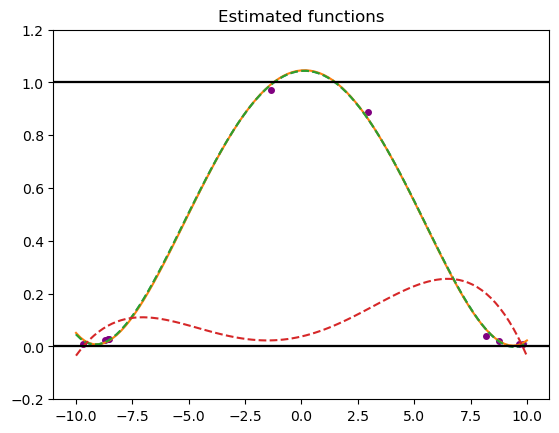

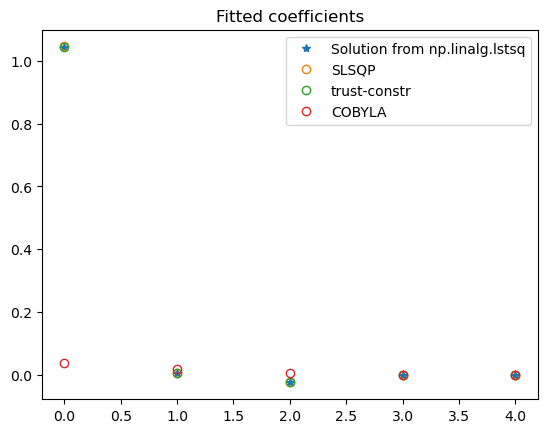

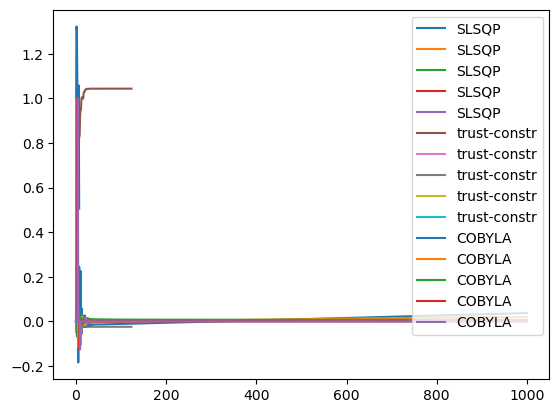

In [466]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy import optimize

plt.figure(1)
plt.plot(x_choose,y,'o',color = 'purple',markersize = 4)
 
def make_matrix(x_choose,k = 6):
    a = list()
    for i in range(k):
        a.append(x_choose ** i)
    a = np.array(a).T
    print(a.shape)
    return a
# a = np.vstack([x,np.ones(len(x))]).T

Korder = 5
a = make_matrix(x_choose,Korder)
from scipy.linalg import solve
x_solution = np.linalg.lstsq(a,y) #change this line
# print(x_solution,b)
# plt.plot(x, y, 'o', label='Original data', markersize=10)
# plt.plot(x, a*x_solution + b, 'r', label='Fitted line')
# plt.legend()
# plt.show()

c = x_solution[0]
plt.figure(2)
plt.title('Fitted coefficients')
plt.plot(c,'*',label='Solution from np.linalg.lstsq')
xtest = np.linspace(-10,10,101)
a = make_matrix(xtest, k=Korder)
ytest = a.dot(c)
plt.figure(1)
# plt.plot(xtest,ytest,'--',label='Solution from np.linalg.lstsq')
plt.plot(xtest,ytest,'--',label='without output constraints')

###########################################

def norm2_sq(x_choose,A,b):
  return np.linalg.norm(A.dot(x_choose) - b)**2# ||Ax - b||^2

# solve argmin || Ax - b ||^2
A = make_matrix(x_choose,k=Korder)
history = []
def save_xk(x):
  history.append(x)

def save_xk_trust_constr(x, state):
  history.append(x)

LB = 0
UB = 1

def plot_result(coeff, history, label, linestyle = '--'):
  plt.figure(1)
  xtest = np.linspace(-10,10,101)
  Atest = make_matrix(xtest,Korder)
  plt.plot(xtest,Atest.dot(coeff),linestyle,label=label)
  # plt.title('Estimated functions '+ 'nd='+ nd_str + ' '+ str(Korder)+' '+ data_type)
  plt.title('Estimated functions')
#   plt.legend()
  plt.axhline(y=UB,c='k')
  plt.axhline(y=LB,c='k')
  low = -0.2 if LB == 0 else LB - np.abs(0.2*LB)
  hi = 1.2 if UB == 0 else UB + np.abs(0.2*UB)
  plt.ylim(np.array([low,hi]))
  plt.savefig('nd='+nd_str+ ' ' + data_type + ' '+ str(Korder)+ '.jpg')
  plt.figure(2)
  plt.plot(coeff,'o',fillstyle='none',label=label)
  # plt.savefig('cf '+'nd='+nd_str+ ' ' + data_type + ' '+ str(Korder)+ '.jpg')
  plt.legend()
  plt.figure(3)
  plt.plot(np.array(history),label=label)
  plt.legend()
# non-constraint
# result = optimize.minimize(norm2_sq, x0 = np.zeros(Korder), method = 'Nelder-Mead', tol=1e-9, callback = save_xk, args = (A,y))
# plot_result(result['x'],history, 'optimize.minimize unconstraint')

# 1. output-contraint -1 < y = A*x < 1
LB, UB = 0, 1
from scipy.optimize import NonlinearConstraint
def output(x):
  global A
  return A.dot(x)
# ybound_constr = NonlinearConstraint(output,0,1)
# result = optimize.minimize(norm2_sq, x0 = np.zeros(Korder), method = 'trust-constr',tol=1e-9, callback = save_xk_trust_constr, args = (A,y), constraints=[ybound_constr])
# cf = result['x']
# plot_result(result['x'],history,'ouput bounded contraint - trust-constr')

# 2. output constraint
names = ['SLSQP','trust-constr','COBYLA']
for n in names:
  history = []
  if n == 'trust-constr':
    y_constraints = [NonlinearConstraint(output,LB,UB)]
    cb = save_xk_trust_constr
  else:
    lower_bound = {'type': 'ineq',
              'fun' : lambda x: output(x)-LB
              }

    upper_bound = {'type': 'ineq',
              'fun' : lambda x: UB-output(x)
              }
    y_constraints = [lower_bound,upper_bound]
    cb = save_xk
  result = optimize.minimize(norm2_sq, x0 = np.zeros(Korder), method = n,tol=1e-9, callback = cb, args = (A,y), constraints=y_constraints)
  cf = result['x']
  if n == 'SLSQP':
    # plot_result(result['x'],history,'output bounded contraint - '+n,linestyle = '-')
    plot_result(result['x'],history,n,linestyle = '-')
  else:
    # plot_result(result['x'],history,'output bounded contraint - '+n)
    plot_result(result['x'],history,n)
#   np.save('history_'+n+'.npy',np.array(history))
#   np.save('coeff_'+n+'.npy',cf)
# data should be stored separately